In [187]:
#Import Libraries and packages
import keras
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import initializers
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import LeakyReLU

In [188]:
# Load & Show some rows of dataset
dataset = pd.read_csv("data.csv")
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,3,9085,1,1,134.0,1,37,38,...,0,5,8,5,12.600000,0,9.4,-0.8,-3.12,Enrolled
1,1,17,2,9254,1,1,128.0,1,38,38,...,0,6,7,5,14.600000,0,11.1,0.6,2.02,Graduate
2,1,1,1,9070,1,1,125.0,1,1,1,...,0,6,11,4,10.833333,0,13.9,-0.3,0.79,Enrolled
3,1,7,2,9085,1,3,130.0,1,3,3,...,0,4,10,0,0.000000,4,10.8,1.4,1.74,Dropout
4,1,1,2,9500,1,1,135.0,1,37,1,...,0,8,12,7,11.721429,0,12.7,3.7,-1.70,Graduate


In [189]:
# Print information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3924 non-null   int64  
 1   Application mode                                3924 non-null   int64  
 2   Application order                               3924 non-null   int64  
 3   Course                                          3924 non-null   int64  
 4   Daytime/evening attendance	                     3924 non-null   int64  
 5   Previous qualification                          3924 non-null   int64  
 6   Previous qualification (grade)                  3924 non-null   float64
 7   Nacionality                                     3924 non-null   int64  
 8   Mother's qualification                          3924 non-null   int64  
 9   Father's qualification                   

In [190]:
# Describe dataset (mean, min, max,...)
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,...,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000
mean,1.187054,18.916922,1.719674,8828.083588,0.888889,4.592253,132.630505,1.940877,19.637105,22.215596,...,0.145005,0.566004,6.221967,8.080275,4.401121,10.155369,0.155708,11.562258,1.229562,0.000940
std,0.620966,17.506016,1.307603,2116.589094,0.314310,10.203432,13.283493,7.207536,15.654578,15.389112,...,0.718726,1.972659,2.239182,3.995208,3.046861,5.258403,0.775265,2.655811,1.383874,2.276859
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


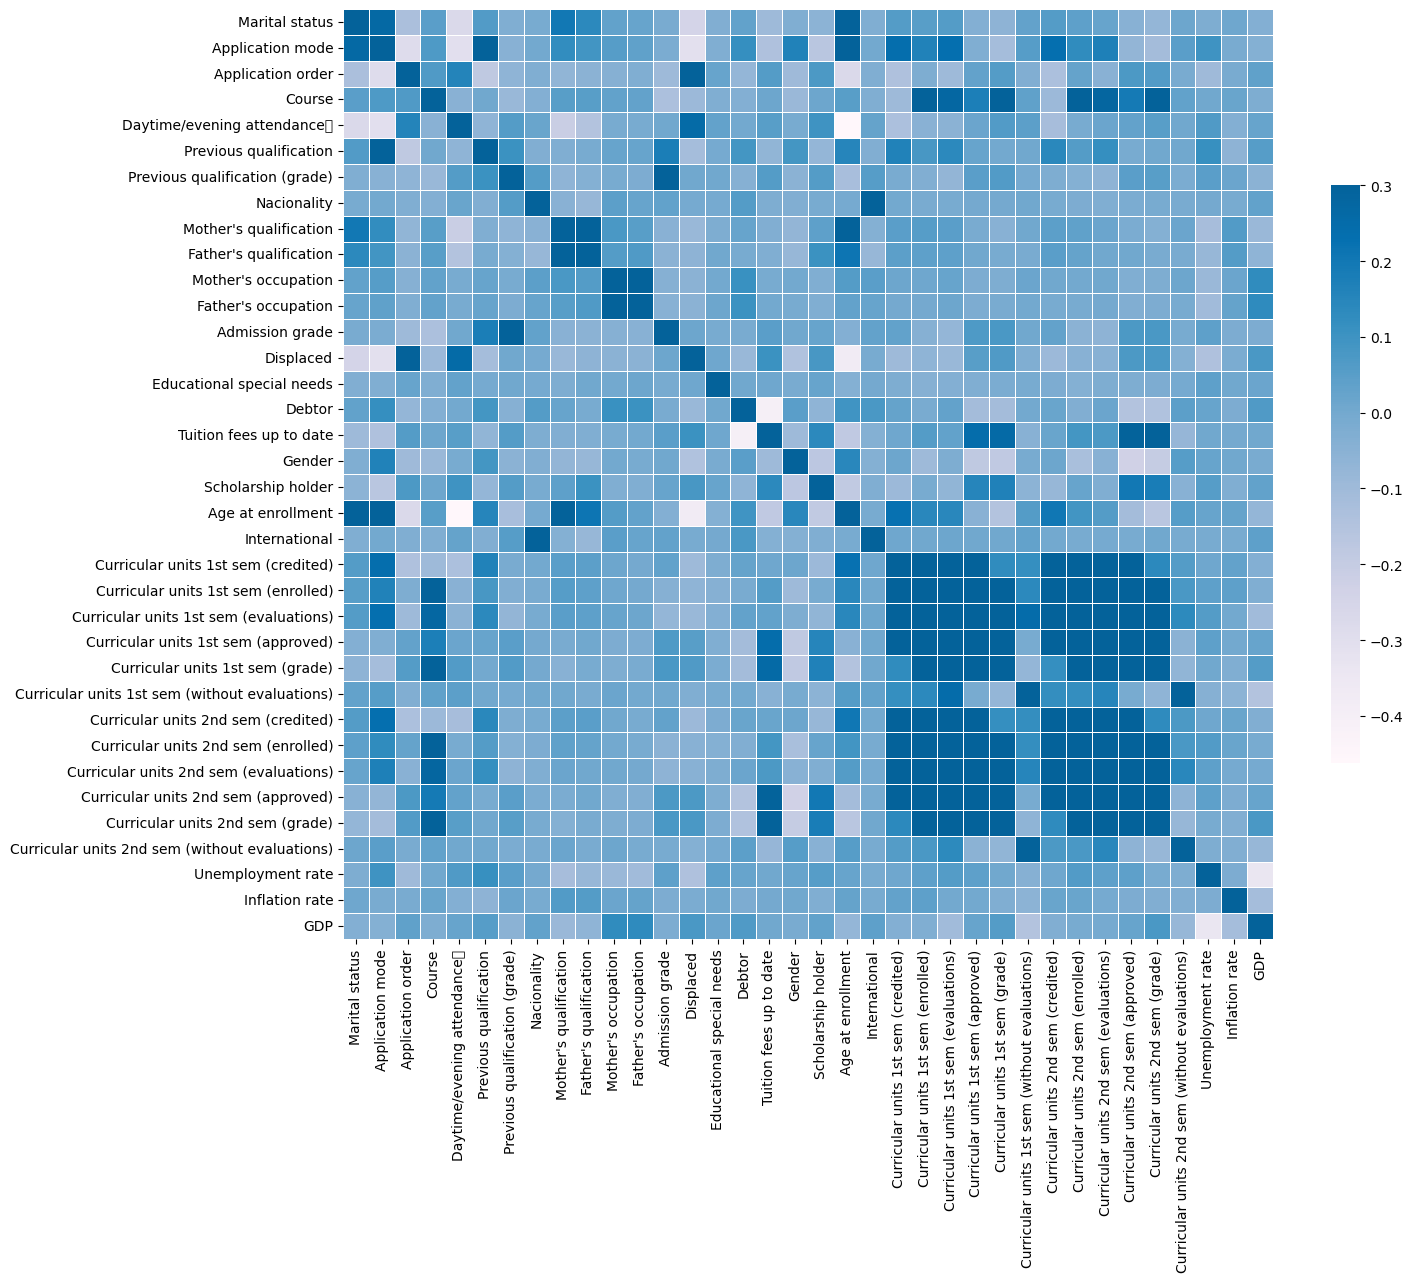

In [191]:
# Data visualization --> Plotting a correlation matrix for features
f = plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(numeric_only = True), annot = False, cmap = 'PuBu',vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show

In [192]:
# Create an instance of the encoder
encoder = OneHotEncoder()
# Fit the encoder to targets
y_train = encoder.fit_transform(dataset[['Target']])
x_train = dataset.drop('Target', axis = 1)
input_shape = x_train.shape[1:]

# apply normalization techniques (mean/std)
for column in x_train: 
    x_train[column] = (x_train[column] - x_train[column].mean()) / x_train[column].std()
    
# Define labels & targets
labels = np.unique(dataset['Target'])
targets = np.array(dataset['Target'])

# Fit the encoder to the labels & targets
encoder.fit(labels.reshape(-1, 1))
encoder.fit(targets.reshape(-1, 1))

# Transform the labels & targets into one-hot encoded vectors
one_hot_labels = encoder.transform(labels.reshape(-1, 1)).toarray()
one_hot_targets = encoder.transform(targets.reshape(-1, 1)).toarray()
# Print original & encoded labels
print("Original labels: ", labels)
print("One-hot encoded labels: ", one_hot_labels)

Original labels:  ['Dropout' 'Enrolled' 'Graduate']
One-hot encoded labels:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [193]:
# Define our model
model = models.Sequential([
    layers.Input(shape = input_shape),
    layers.Dense(64, kernel_initializer = 'random_normal', activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')])

# Printing out the summary of the created model
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 64)                2368      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_20 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_77 (Dense)            (None, 16)                528       
                                                                 
 dense_78 (Dense)            (None, 3)                 51        
                                                     

In [194]:
# Compiling model with Adam optimizer & LR = 0.0005
optimizer = keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer= optimizer, loss = keras.losses.CategoricalCrossentropy(), metrics= ['accuracy'])

C:\Users\USER\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [195]:
# Fit model to our trainiing dataset with early stopping
fitModel = model.fit(x_train, one_hot_targets, batch_size= 256, epochs= 100, validation_split= 0.1, callbacks = tf.keras.callbacks.EarlyStopping(verbose=1, patience=10))

Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 1.1469 - accuracy: 0.4157 - val_loss: 1.0451 - val_accuracy: 0.5496
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9698 - accuracy: 0.5704 - val_loss: 1.0135 - val_accuracy: 0.6489
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8886 - accuracy: 0.6259 - val_loss: 0.9773 - val_accuracy: 0.6819
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8214 - accuracy: 0.6624 - val_loss: 0.9375 - val_accuracy: 0.6921
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.6837 - val_loss: 0.9010 - val_accuracy: 0.7023
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7551 - accuracy: 0.6890 - val_loss: 0.8678 - val_accuracy: 0.6997
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7103 - accuracy: 0.7049 - val_loss: 0.8360 - val_accuracy: 0.7023
Epoch 8/100


Text(0, 0.5, 'Accuracy')

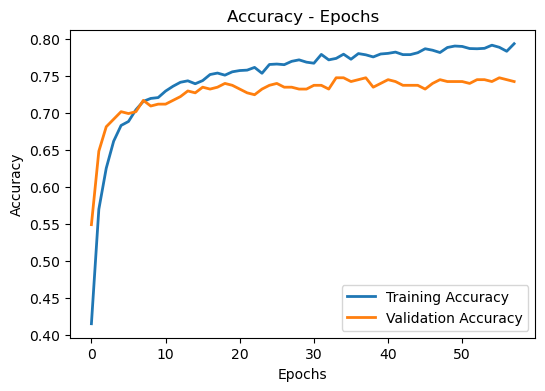

In [196]:
# Accuracy plot
plt.figure(figsize=[6,4])
plt.title('Accuracy - Epochs')
plt.plot(fitModel.history['accuracy'], linewidth=2.0)
plt.plot(fitModel.history['val_accuracy'], linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)

Text(0, 0.5, 'Loss')

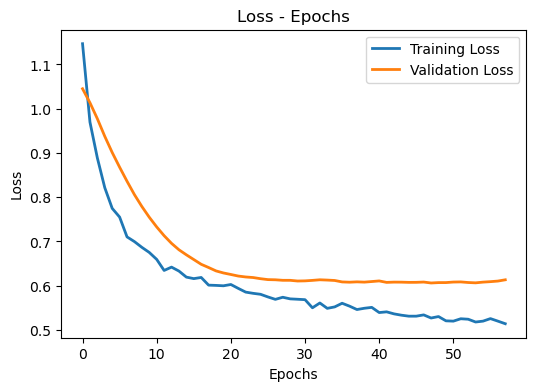

In [197]:
# Loss plot
plt.figure(figsize=[6,4])
plt.title('Loss - Epochs')
plt.plot(fitModel.history['loss'], linewidth=2.0)
plt.plot(fitModel.history['val_loss'], linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)